In [128]:
# Load libraries
import csv
import matplotlib.pyplot as plt
import statistics
import numpy as np
import os
from IPython.display import clear_output

In [129]:
# Set filepath
repository='/home/ebb505/ARE_Project/are-logs/LC_NS_MS/0/'
experimentName = "0"
filename='noreptests.csv'
oFile='expManScore.csv'

In [130]:
# Get all directories
folders = []
# r=root, d=directories, f = files
for r, d, f in os.walk(repository):
    for folder in d:
        folders.append(os.path.join(r, folder))
print("Folders: ", len(folders))

Folders:  17


In [131]:
# Get information from files
my_replicates = []
for f in folders:
    my_list = []
    with open(f + '/' + filename, 'r') as csvfile:
        data = csv.reader(csvfile, delimiter=',', quotechar='"')
        for row in data:
            my_list.append(row[:-1]) # Last character is empty for some reason
    my_replicates.append(my_list)

In [132]:
# Estimate average for each generation
population = 25
replicates = len(my_replicates)
evaluations = len(my_replicates[0])
featureSize = len(my_replicates[0][0])
generations = int(evaluations / population)
interval=1000
rangeValues = range(0,evaluations,interval)
lenRange = len(rangeValues)
print("Replicates: ", replicates, "Number of evaluations: ", evaluations, "Features size: ", featureSize)

Replicates:  17 Number of evaluations:  11898 Features size:  5


In [133]:
# Process data
repRes = []
for rep in range(replicates):
    dat = np.array([[float(y) for y in x] for x in my_replicates[rep]]) # Convert to array
    repRes.append(dat)
print("Done!")

Done!


In [141]:
# Analyse data
sumManRobots = []
for rep in range(replicates):
    tempManScore = []
    for i in range(interval,evaluations,interval):
        tempManScore.append(np.mean(repRes[rep][:i,4]))
        #print(np.max(repRes[rep][:i][4]))
    sumManRobots.append(tempManScore)

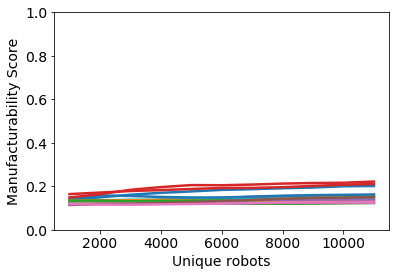

In [142]:
# Plot stuff
xValues = list(range(interval, evaluations, interval))
xValues = [x/interval for x in xValues]
# Plot stuff
font = {'weight' : 'normal',
        'size'   : 14.0}

plt.rc('font', **font)
plt.figure(0)

for rep in range(replicates):
    plt.plot(xValues, sumManRobots[rep], '-', linewidth=2.5)

#plt.plot(xValues, sumManRobots[0], '-', color='blue',  linewidth=2.5)

# plt.boxplot(sumManRobots, notch=True)

plt.xlabel('Unique robots')
plt.ylabel('Manufacturability Score')

axes = plt.gca()
axes.set_ylim([0,1.0])

# rangeX = range(0,lenRange*5000,5000) # Why are these offsets necessary?
# posX = range(0,lenRange,200) # Why are these offsets necessary?
rangeX = range(2000,12000,2000) # Why are these offsets necessary?
posX = range(2,12,2) # Why are these offsets necessary?
plt.xticks(posX,rangeX)

#plt.legend(['No collisions','Good orientations','Gripper access' ])
#plt.title("Manufacturability Score")
plt.savefig(repository+experimentName+'expManScoreMean.png',dpi=200)

In [145]:
# Save to CSV
with open(repository + experimentName + oFile, 'w', newline='') as write_obj:
    csv_writer = csv.writer(write_obj)
    for i in range(replicates):
        csv_writer.writerow(sumManRobots[i])

In [144]:
print(len(sumManRobots[0]))

11
